In [6]:

'''
解决汉字乱码问题
'''
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体
plt.rcParams['axes.unicode_minus'] = False
import os
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体
plt.rcParams['axes.unicode_minus'] = False


# 1. 加载数据
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print(f"{os.path.basename(file_path)} 加载成功")
        return data
    except Exception as e:
        print(f"{os.path.basename(file_path)} 加载失败:", e)
        return None


# 2. 数据清理
def clean_data(data):
    # 检查缺失值
    missing_data = data.isnull().sum()
    print("缺失值统计:\n", missing_data[missing_data > 0])

    # 检查重复值
    duplicates = data.duplicated().sum()
    print("重复值数量:", duplicates)

    return data


file_paths = {
    "用户行为表": "电商平台行为数据表/用户行为表.csv",
    "用户表": "电商平台行为数据表/用户表.csv",
    "用户评论表": "电商平台行为数据表/用户评论表.csv",
    "用户购买信息表": "电商平台行为数据表/用户购买信息表.csv",
    "订单表": "电商平台行为数据表/订单表.csv"
}
# 加载各个CSV文件
user_behavior = load_data(file_paths["用户行为表"])
user_info = load_data(file_paths["用户表"])
user_comments = load_data(file_paths["用户评论表"])
purchase_info = load_data(file_paths["用户购买信息表"])
orders = load_data(file_paths["订单表"])

用户行为表.csv 加载成功
用户表.csv 加载成功
用户评论表.csv 加载成功
用户购买信息表.csv 加载成功
订单表.csv 加载成功


In [7]:
'''
从这开始开始对用户行为信息表进行数据分析

'''
user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98924 entries, 0 to 98923
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   用户id    98924 non-null  int64  
 1   订单量     98924 non-null  int64  
 2   商品种类数   98924 non-null  int64  
 3   商品数量    98924 non-null  int64  
 4   用户长度    98924 non-null  int64  
 5   复购次数    80670 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 4.5 MB


In [8]:
#统计并删除了缺失值
clean_data(user_behavior)
user_behavior =user_behavior.dropna(subset=['复购次数'])  # 假设列名为 '复购次数'

缺失值统计:
 复购次数    18254
dtype: int64
重复值数量: 0


In [9]:
user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80670 entries, 0 to 98923
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   用户id    80670 non-null  int64  
 1   订单量     80670 non-null  int64  
 2   商品种类数   80670 non-null  int64  
 3   商品数量    80670 non-null  int64  
 4   用户长度    80670 non-null  int64  
 5   复购次数    80670 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 4.3 MB


<Figure size 1000x600 with 0 Axes>

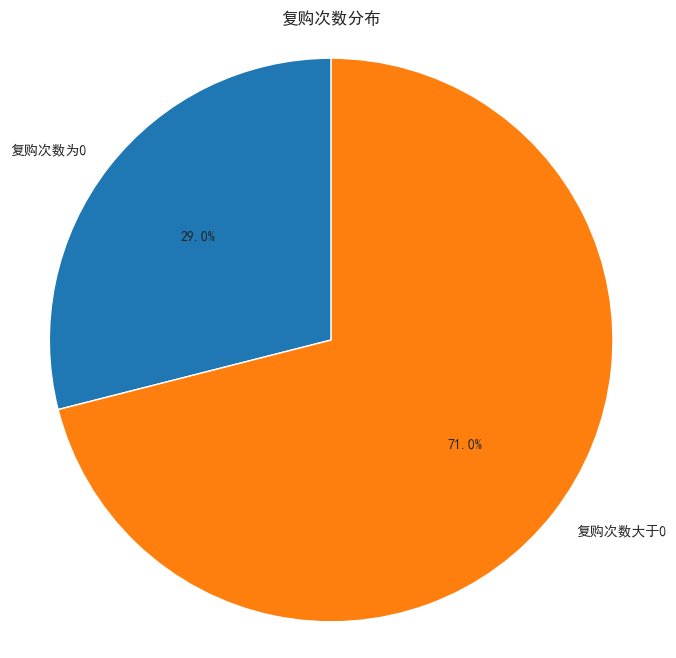

In [10]:
# 绘制复购次数为0和其他值的饼状图
plt.figure(figsize=(10, 6))

repurchase_counts = user_behavior['复购次数'].value_counts()
labels = ['复购次数为0', '复购次数大于0']
sizes = [repurchase_counts.get(0, 0), repurchase_counts.sum() - repurchase_counts.get(0, 0)]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("复购次数分布")
plt.axis('equal')  # 确保饼状图是圆形
plt.show()

D:\apk\anaconda\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


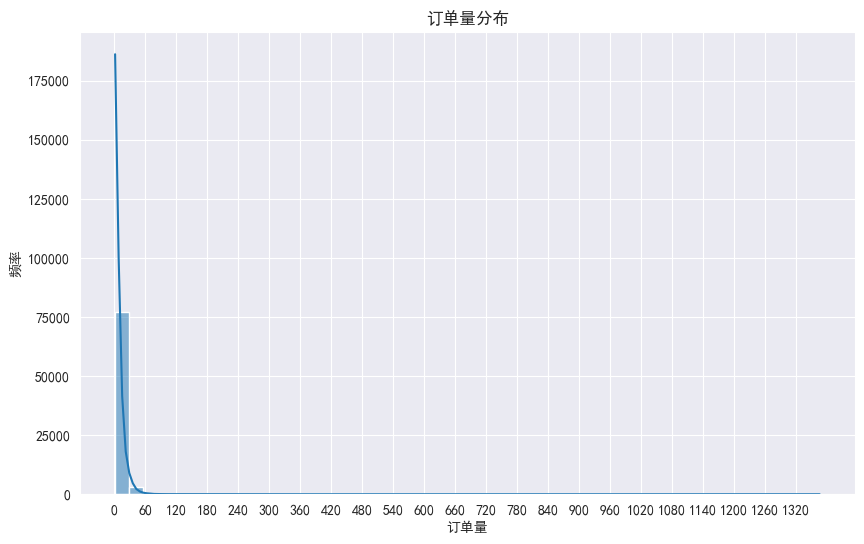

In [11]:
#订单量分布
plt.figure(figsize=(10, 6))
sns.histplot(user_behavior['订单量'], bins=50, kde=True)
plt.title("订单量分布")
plt.xlabel("订单量")
plt.ylabel("频率")
plt.xticks(ticks=range(0, int(user_behavior['订单量'].max()) + 1, 60))
plt.show()

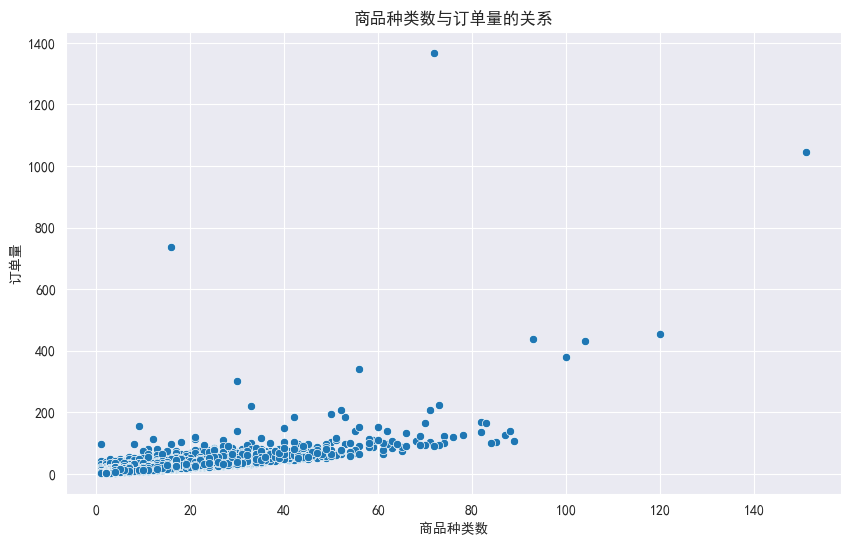

In [12]:
# 商品种类数与订单量的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='商品种类数', y='订单量', data=user_behavior)
plt.title("商品种类数与订单量的关系")
plt.xlabel("商品种类数")
plt.ylabel("订单量")
plt.show()

D:\apk\anaconda\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


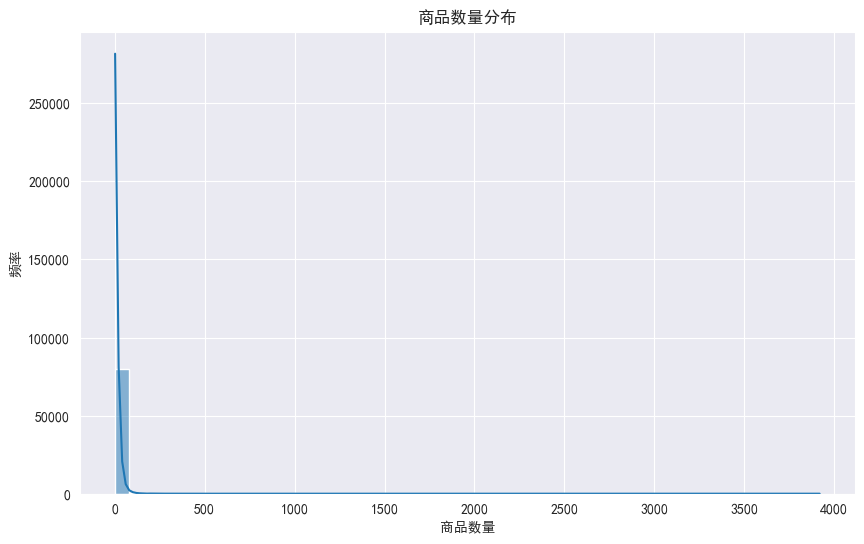

In [13]:
# 商品数量分布
plt.figure(figsize=(10, 6))
sns.histplot(user_behavior['商品数量'], bins=50, kde=True)
plt.title("商品数量分布")
plt.xlabel("商品数量")
plt.ylabel("频率")
plt.show()

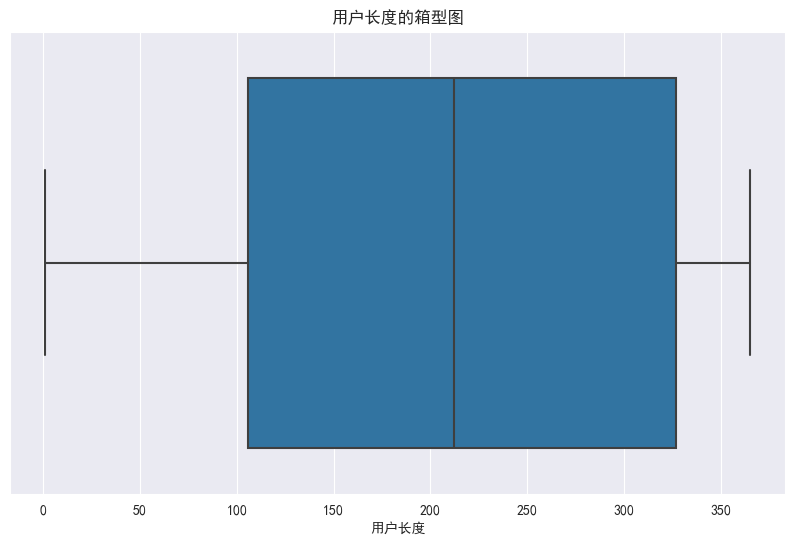

'\n这个箱型图显示，“用户长度”数据在 0 到 350 之间较为均匀地分布，没有明显的极端值或异常值，也没有强烈的偏斜。这说明大多数用户的使用时长（用户长度）差异不大，可能较为平均。\n\n\n'

In [14]:
# 用户长度的箱型图
plt.figure(figsize=(10, 6))
sns.boxplot(x=user_behavior['用户长度'])
plt.title("用户长度的箱型图")
plt.xlabel("用户长度")
plt.show()

'''
这个箱型图显示，“用户长度”数据在 0 到 350 之间较为均匀地分布，没有明显的极端值或异常值，也没有强烈的偏斜。这说明大多数用户的使用时长（用户长度）差异不大，可能较为平均。


'''

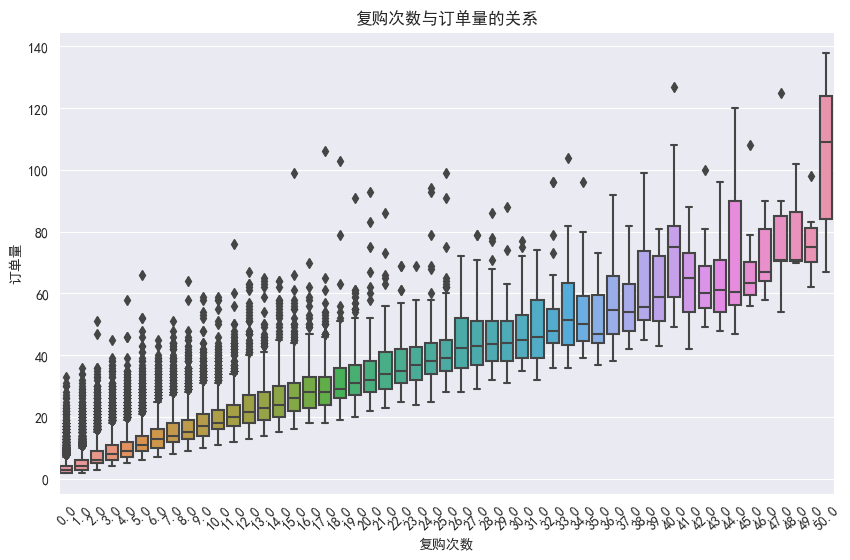

横轴（复购次数）：横轴表示用户的复购次数。复购次数越高的用户，通常意味着他们在平台上购买的频率越高。

纵轴（订单量）：纵轴表示订单量，即每个用户的订单数量。这个指标反映了用户购买商品的数量或频率。

箱型图的分布：

每个复购次数的箱型图代表订单量的分布情况。
箱体表示该复购次数对应订单量的四分位数范围：从第一四分位数 (Q1) 到第三四分位数 (Q3)。
箱体中的中间线代表该复购次数对应订单量的中位数 (Q2)，显示订单量的中间值。
须表示数据的范围（不包括异常值），反映订单量的极值。
箱型图上方的散点表示异常值，这些用户的订单量比一般水平要高很多。
趋势观察：

随着“复购次数”的增加，订单量的分布范围也在逐渐扩大。箱体变得更高且更宽，这表明复购次数较高的用户，其订单量分布也更加分散。
中位数的上升表明订单量随着复购次数的增加而增加。复购次数越高，通常订单量也越大。
异常值（箱体上方的散点）也随着复购次数的增加而增多，说明复购次数较高的用户中，有一些用户下单量特别大。


In [19]:
#  复购次数与订单量的关系
plt.figure(figsize=(10, 6))
filtered_data = user_behavior[user_behavior['复购次数'] <= 50]

sns.boxplot(x='复购次数', y='订单量', data=filtered_data)
plt.title("复购次数与订单量的关系")
plt.xlabel("复购次数")
plt.ylabel("订单量")
plt.xticks(rotation=45)
plt.show()
print('''横轴（复购次数）：横轴表示用户的复购次数。复购次数越高的用户，通常意味着他们在平台上购买的频率越高。

纵轴（订单量）：纵轴表示订单量，即每个用户的订单数量。这个指标反映了用户购买商品的数量或频率。

箱型图的分布：

每个复购次数的箱型图代表订单量的分布情况。
箱体表示该复购次数对应订单量的四分位数范围：从第一四分位数 (Q1) 到第三四分位数 (Q3)。
箱体中的中间线代表该复购次数对应订单量的中位数 (Q2)，显示订单量的中间值。
须表示数据的范围（不包括异常值），反映订单量的极值。
箱型图上方的散点表示异常值，这些用户的订单量比一般水平要高很多。
趋势观察：

随着“复购次数”的增加，订单量的分布范围也在逐渐扩大。箱体变得更高且更宽，这表明复购次数较高的用户，其订单量分布也更加分散。
中位数的上升表明订单量随着复购次数的增加而增加。复购次数越高，通常订单量也越大。
异常值（箱体上方的散点）也随着复购次数的增加而增多，说明复购次数较高的用户中，有一些用户下单量特别大。''')



D:\apk\anaconda\envs\py310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


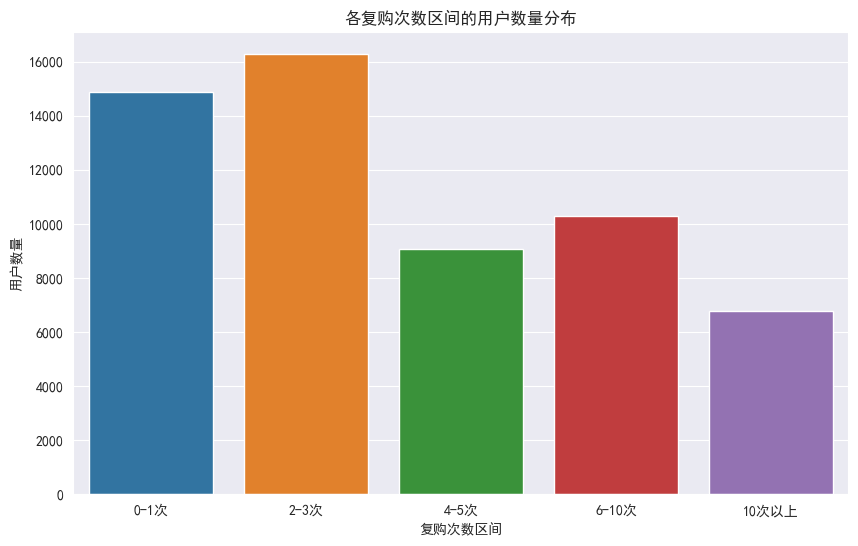

In [16]:
# 各复购次数的用户数量分布

# 将复购次数分箱，例如：0-1次, 2-3次, 4-5次, 6-10次, 10次以上
user_behavior['复购次数区间'] = pd.cut(user_behavior['复购次数'],
                                       bins=[0, 1, 3, 5, 10, user_behavior['复购次数'].max()],
                                       labels=['0-1次', '2-3次', '4-5次', '6-10次', '10次以上'])

# 计算每个复购次数区间的用户数量
repurchase_counts_binned = user_behavior['复购次数区间'].value_counts().sort_index()

# 绘制条形图
plt.figure(figsize=(10, 6))
sns.barplot(x=repurchase_counts_binned.index, y=repurchase_counts_binned.values)
plt.title("各复购次数区间的用户数量分布")
plt.xlabel("复购次数区间")
plt.ylabel("用户数量")

plt.show()

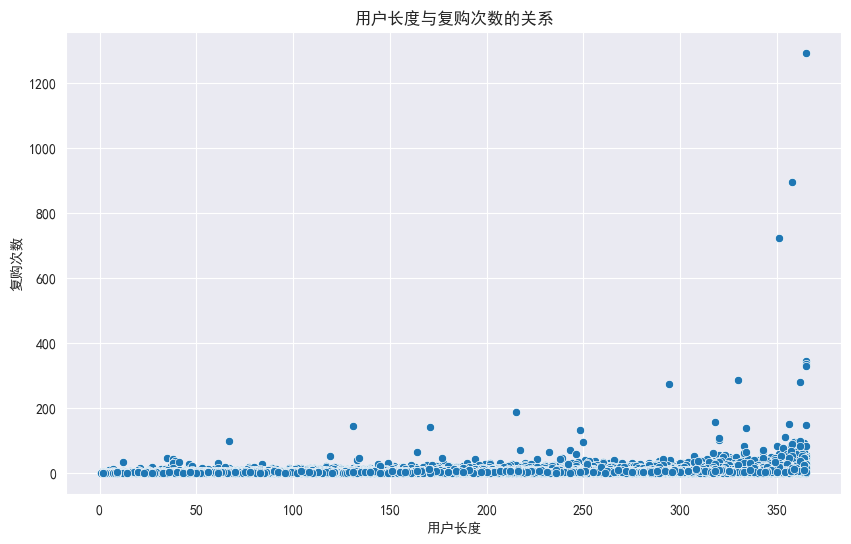

In [17]:
#  用户长度与复购次数的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='用户长度', y='复购次数', data=user_behavior)
plt.title("用户长度与复购次数的关系")
plt.xlabel("用户长度")
plt.ylabel("复购次数")
plt.show()

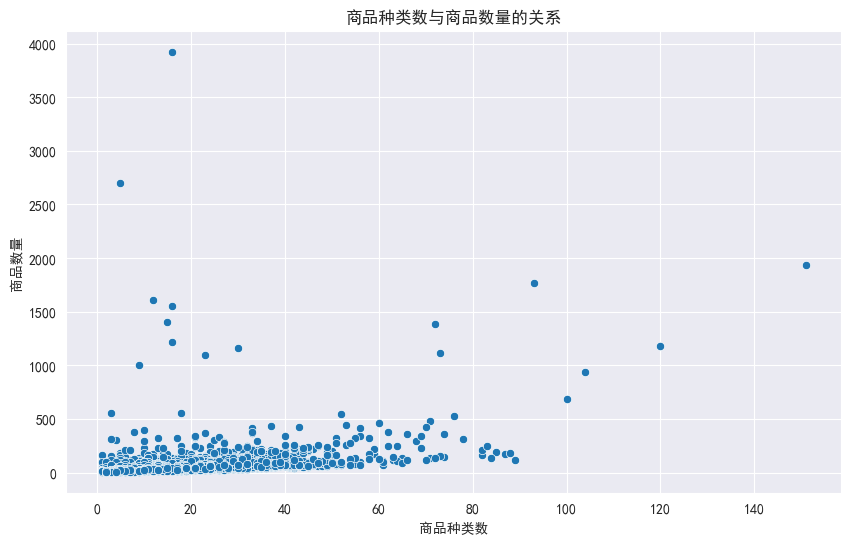

In [18]:
#  商品种类数与商品数量的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='商品种类数', y='商品数量', data=user_behavior)
plt.title("商品种类数与商品数量的关系")
plt.xlabel("商品种类数")
plt.ylabel("商品数量")
plt.show()